## Testing CV implementation (non-sample map)
Previous tests used the sample map with rotation angle 45 degrees and scale_factor = 1. This test uses a non-sample map, and uses scale factor != 1.

In [1]:
import sunpy.data.sample
import sunpy.map
import skimage
import scipy
import numpy as np
import astropy
import astropy.units as u
import cv2
import pyinstrument
from pyinstrument import Profiler
import sunpy.data.sample
import sunpy.map

In [2]:
#dev code
print(sunpy.__version__)
print(np.__version__)
print(skimage.__version__)
print(scipy.__version__)
print(astropy.__version__)
print(cv2.__version__)
print(pyinstrument.__version__)

2.1.dev341+gf35e21e40.d20200910
1.19.1
0.17.2
1.5.2
4.0.1.post1
4.4.0
3.2.0


In [3]:
aia_map2 = sunpy.map.Map('aia_lev1_171a_2017_09_10t13_13_09_35z_image_lev1.fits')
print(aia_map2.rotation_matrix)
if ((aia_map2.scale[0] / 0.6).round() != 1.0 * u.arcsec / u.pix
        and aia_map2.data.shape != (4096, 4096)):
    scale = (aia_map2.scale[0] / 0.6).round() * 0.6 * u.arcsec
else:
    scale = 0.6 * u.arcsec  # pragma: no cover # can't test this because it needs a full res image
scale_factor = aia_map2.scale[0] / scale
print(scale_factor)

[[ 9.99999943e-01 -3.38227349e-04]
 [ 3.38227349e-04  9.99999943e-01]]
0.9991483333333334 1 / pix


In [4]:
profiler_sk = Profiler()
# default skimage
profiler_sk.start()
aia_map2_r_sk = aia_map2.rotate(order=3, recenter=True, scale=scale_factor.value)
profiler_sk.stop()
print(profiler_sk.output_text(unicode=True, color=True))


  _     ._   __/__   _ _  _  _ _/_   Recorded: 16:55:40  Samples:  1594
 /_//_/// /_\ / //_// / //_'/ //     Duration: 3.452     CPU time: 3.375
/   _/                      v3.2.0

Program: /mnt/c/Users/cmbard/Documents/Science/sun_devo_env/lib/python3.7/site-packages/ipykernel_launcher.py -f /home/cmbard/.local/share/jupyter/runtime/kernel-312999a0-652e-489b-80fd-2c26b264e60c.json

3.452 run_code  IPython/core/interactiveshell.py:3376
└─ 3.452 <module>  <ipython-input-4-9b3053babeff>:4
   └─ 3.452 wrapper  astropy/units/decorators.py:165
         [3 frames hidden]  astropy
            3.451 rotate  sunpy/map/mapbase.py:1237
            ├─ 2.605 affine_transform  sunpy/image/transform.py:29
            │  ├─ 1.567 warp  skimage/transform/_warps.py:684
            │  │     [18 frames hidden]  skimage, numpy, <built-in>, <__array_...
            │  │        1.275 [self]  
            │  ├─ 0.839 <module>  skimage/transform/__init__.py:1
            │  │     [691 frames hidden]  skimage,

In [5]:
profiler_sci = Profiler()
profiler_sci.start()
aia_map2_r_sci = aia_map2.rotate(order=3, recenter=True, use_scipy=True, scale=scale_factor.value)
profiler_sci.stop()
print(profiler_sci.output_text(unicode=True, color=True))


  _     ._   __/__   _ _  _  _ _/_   Recorded: 16:55:43  Samples:  720
 /_//_/// /_\ / //_// / //_'/ //     Duration: 3.332     CPU time: 3.328
/   _/                      v3.2.0

Program: /mnt/c/Users/cmbard/Documents/Science/sun_devo_env/lib/python3.7/site-packages/ipykernel_launcher.py -f /home/cmbard/.local/share/jupyter/runtime/kernel-312999a0-652e-489b-80fd-2c26b264e60c.json

3.331 run_code  IPython/core/interactiveshell.py:3376
└─ 3.331 <module>  <ipython-input-5-8fe3ed51e5d5>:3
   └─ 3.331 wrapper  astropy/units/decorators.py:165
      └─ 3.331 rotate  sunpy/map/mapbase.py:1237
         ├─ 2.573 affine_transform  sunpy/image/transform.py:29
         │  ├─ 2.491 affine_transform  scipy/ndimage/interpolation.py:395
         │  │     [7 frames hidden]  scipy, <built-in>
         │  │        1.811 geometric_transform  <built-in>:0
         │  │        0.681 spline_filter1d  <built-in>:0
         │  ├─ 0.044 [self]  
         │  └─ 0.037 nan_to_num  <__array_function__ internals>:2

In [6]:
profiler_cv = Profiler()
profiler_cv.start()
aia_map2_r_cv = aia_map2.rotate(order=3, recenter=True, use_cv2=True, scale=scale_factor.value)
profiler_cv.stop()
print(profiler_cv.output_text(unicode=True, color=True))


  _     ._   __/__   _ _  _  _ _/_   Recorded: 16:55:47  Samples:  758
 /_//_/// /_\ / //_// / //_'/ //     Duration: 1.517     CPU time: 2.000
/   _/                      v3.2.0

Program: /mnt/c/Users/cmbard/Documents/Science/sun_devo_env/lib/python3.7/site-packages/ipykernel_launcher.py -f /home/cmbard/.local/share/jupyter/runtime/kernel-312999a0-652e-489b-80fd-2c26b264e60c.json

1.517 run_code  IPython/core/interactiveshell.py:3376
└─ 1.517 <module>  <ipython-input-6-2d183cfa8eb9>:3
   └─ 1.517 wrapper  astropy/units/decorators.py:165
      └─ 1.517 rotate  sunpy/map/mapbase.py:1237
         ├─ 0.722 affine_transform  sunpy/image/transform.py:29
         │  ├─ 0.557 warpAffine  <built-in>:0
         │  │     [2 frames hidden]  <built-in>
         │  ├─ 0.139 ndarray.astype  <built-in>:0
         │  │     [2 frames hidden]  <built-in>
         │  └─ 0.026 _showwarnmsg  warnings.py:96
         │        [15 frames hidden]  warnings, astropy, posixpath, generic...
         ├─ 0.382 ref

I've used scipy with int16 arrays since there is no way to upscale the image to 64 bit via the `map.rotate()` function call. From the timings, we see:

|scipy 16bit|skimage 64bit|cv 64bit|
|---|---|---|
|3.3s|3.4s|1.5 s|

These are approximate numbers, but clearly openCV is the fastest implementation.

Now, since skimage, scipy, and cv all use different algorithms, we need a basis for comparison: what is an acceptable margin of difference in the data arrays? Not sure the best way to compare, but I've decided to use the [Symmetric Mean Absolute Percentage Error](https://en.wikipedia.org/wiki/Symmetric_mean_absolute_percentage_error) (the third equation in the link):

In [7]:
#SymmetricMeanAbsolutePercentageError
# returns between 0-100% of average error between arr1 and arr2 
def smape(arr1,arr2):
    eps = np.finfo(np.float64).eps
    return ((np.abs(arr1-arr2) / (np.maximum(np.abs(arr1)+np.abs(arr2),eps))).mean() * 100)

def smape_arr(arr1,arr2):
    eps = np.finfo(np.float64).eps
    return ((np.abs(arr1-arr2) / (np.maximum(np.abs(arr1)+np.abs(arr2),eps))) * 100)


In [8]:
print("sk64 vs. sci16",smape(aia_map2_r_sk.data, aia_map2_r_sci.data))
print("sci16 vs. cv64",smape(aia_map2_r_sci.data, aia_map2_r_cv.data))
print("sk64 vs. cv64",smape(aia_map2_r_sk.data, aia_map2_r_cv.data))

sk64 vs. sci16 3.6153143891354733
sci16 vs. cv64 3.38614892818502
sk64 vs. cv64 1.0964688574546244


This gives me a baseline for what constitutes an "acceptable difference" between the currently implemented results of `rotate` (sk vs. scipy). For the "real data map", the SMAPE is ~3% between `skimage` and `scipy` (if I had used scipy in `float64`, this number would be closer to the ~1.1% seen between sk and cv). Note, however, that some of the edges of the solar disk (and possibly off-disk) will have differences between \[A NUMBER\] and 0. -> this returns SMAPE = 100% error, but the raw error in those cells is very small. Excluding these cells from the average SMAPE gives us a better understanding of the differences within the solar disk:

In [9]:
arr_diff = smape_arr(aia_map2_r_sk.data, aia_map2_r_sci.data)
print(arr_diff.max(), arr_diff.min()) #should be between 0 and 100
err_full = np.where(arr_diff == 100)
err_exclude_full = np.where(arr_diff != 100)

print("max raw count error in 100% error cells",((np.abs(aia_map2_r_sk.data-aia_map2_r_sci.data))[err_full]).max())
max_raw = np.abs(aia_map2_r_sk.data-aia_map2_r_sci.data).max()
idx_max = np.where(np.abs(aia_map2_r_sk.data-aia_map2_r_sci.data) == max_raw)
print("max raw count error overall and relative % difference in that cell:", max_raw,arr_diff[idx_max])

print("SMAPE sk64 vs. sci16, excluding 100% error cells", arr_diff[err_exclude_full].mean())

100.0 0.0
max raw count error in 100% error cells 13.577193623589288
max raw count error overall and relative % difference in that cell: 110.0 [91.66666667]
SMAPE sk64 vs. sci16, excluding 100% error cells 1.423205699741751


In [10]:
arr_diff = smape_arr(aia_map2_r_cv.data, aia_map2_r_sci.data)
print(arr_diff.max(), arr_diff.min()) #should be between 0 and 100
err_full = np.where(arr_diff == 100)
err_exclude_full = np.where(arr_diff != 100)

print("max raw count error in 100% error cells",((np.abs(aia_map2_r_cv.data-aia_map2_r_sci.data))[err_full]).max())
max_raw = np.abs(aia_map2_r_cv.data-aia_map2_r_sci.data).max()
idx_max = np.where(np.abs(aia_map2_r_cv.data-aia_map2_r_sci.data) == max_raw)
print("max raw count error overall and relative % difference in that cell:", max_raw,arr_diff[idx_max])

print("SMAPE cv64 vs. sci16, excluding 100% error cells", arr_diff[err_exclude_full].mean())

100.0 0.0
max raw count error in 100% error cells 26.046376135200262
max raw count error overall and relative % difference in that cell: 62.350355870090425 [1.26616409]
SMAPE cv64 vs. sci16, excluding 100% error cells 1.203394898885752


In [11]:
arr_diff = smape_arr(aia_map2_r_sk.data, aia_map2_r_cv.data)
print(arr_diff.max(), arr_diff.min()) #should be between 0 and 100
err_full = np.where(arr_diff == 100)
err_exclude_full = np.where(arr_diff != 100)

print("max raw count error in 100% error cells",((np.abs(aia_map2_r_sk.data-aia_map2_r_cv.data))[err_full]).max())
max_raw = np.abs(aia_map2_r_sk.data-aia_map2_r_cv.data).max()
idx_max = np.where(np.abs(aia_map2_r_sk.data-aia_map2_r_cv.data) == max_raw)
print("max raw count error overall and relative % difference in that cell:", max_raw,arr_diff[idx_max])

print("SMAPE sk64 vs. cv64, excluding 100% error cells", arr_diff[err_exclude_full].mean())

100.0 0.0
max raw count error in 100% error cells 8.886457240389596
max raw count error overall and relative % difference in that cell: 96.61499600707612 [1.70747728]
SMAPE sk64 vs. cv64, excluding 100% error cells 0.9631191637576004


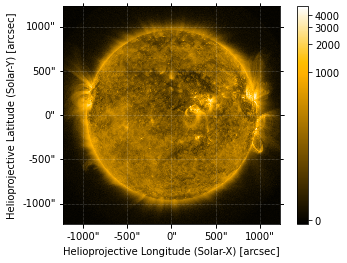

In [12]:
# finally pictures!
aia_map2_r_sk.peek()

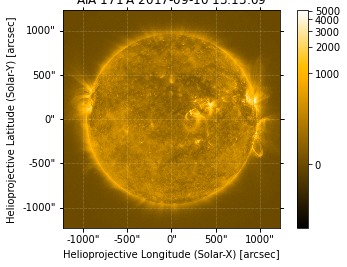

In [13]:
aia_map2_r_sci.peek()

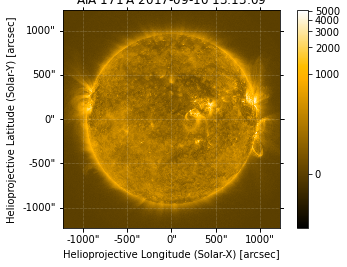

In [14]:
aia_map2_r_cv.peek()